In [34]:
from lda_model import sent_to_words, process_data_words, build_model,format_topics_sentences,frequency_distribution_word_counts_in_documents
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
from matplotlib.ticker import FuncFormatter

In [6]:
import os
os.getcwd()

'/home/yiyi/Documents/masterthesis/CPD/topic_modeling/notebooks'

In [21]:
def pyldavis_plot(lda_model):
    """
    Show LDAvis .
    :param lda_model:
    :return:
    """
    import pyLDAvis.gensim
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
    vis

In [20]:
# load data for each corpus (each csv file)
import matplotlib.pyplot as plt

import pandas as pd
filepath='/home/yiyi/Documents/masterthesis/CPD/data/cleand_query_output_csv/019b8823-aa09-4d8f-8b8d-26433d76dff3'
df = pd.read_csv(filepath)
df["words"] = df['text'] + df['title']
words_df = df[df.lang == 'en']
words_df = words_df[words_df.words.notnull()]
docs = words_df.words.to_list()  # => data
# process the data words
data_words = list(sent_to_words(docs))

data_ready = process_data_words(data_words)
# build lda model
corpus, lda_model = build_model(data_ready)

# format topics sentences

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

[(0,
  '0.041*"hotel" + 0.041*"beach" + 0.041*"stay" + 0.036*"great" + '
  '0.035*"staff" + 0.034*"room" + 0.033*"pool" + 0.029*"property" + '
  '0.028*"clean" + 0.028*"location"'),
 (1,
  '0.034*"service" + 0.019*"restaurant" + 0.019*"call" + 0.019*"price" + '
  '0.018*"check" + 0.017*"hotel" + 0.017*"ask" + 0.017*"bad" + 0.015*"never" + '
  '0.013*"day"'),
 (2,
  '0.033*"staff" + 0.032*"stay" + 0.023*"time" + 0.022*"reach" + '
  '0.021*"friendly" + 0.017*"breakfast" + 0.014*"back" + 0.013*"view" + '
  '0.013*"helpful" + 0.013*"way"'),
 (3,
  '0.071*"room" + 0.024*"hotel" + 0.014*"elevator" + 0.013*"expect" + '
  '0.013*"tell" + 0.013*"stay" + 0.012*"night" + 0.010*"work" + '
  '0.010*"bathroom" + 0.010*"day"')]


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.8965,"staff, stay, time, reach, friendly, breakfast,...","[tastfully, decorate, modern, convenience, doc..."
1,1,1.0,0.5457,"service, restaurant, call, price, check, hotel...","[give, room, hear, band, play, late, room, vac..."
2,2,1.0,0.6312,"service, restaurant, call, price, check, hotel...","[large, private, beach, large, pool, plenty, o..."
3,3,0.0,0.8109,"hotel, beach, stay, great, staff, room, pool, ...","[great, place, stay]"
4,4,0.0,0.7385,"hotel, beach, stay, great, staff, room, pool, ...","[comfortable, attractive, room, complaint, roo..."
5,5,2.0,0.4966,"staff, stay, time, reach, friendly, breakfast,...","[hotel, stay, honeymoon, reservation, stay, ho..."
6,6,2.0,0.6250,"staff, stay, time, reach, friendly, breakfast,...","[enough, amenity, cost, room, breakfast, inter..."
7,7,0.0,0.5881,"hotel, beach, stay, great, staff, room, pool, ...","[fun, place, much, resort, trip, enjoyable, cr..."
8,8,0.0,0.8239,"hotel, beach, stay, great, staff, room, pool, ...","[hotel, room, comfortable, clean, upscale, lov..."
9,9,2.0,0.7913,"staff, stay, time, reach, friendly, breakfast,...","[lunch, pool, staff, wonderful, friendly, help..."


In [27]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.215626  0.051209       1        1  31.785461
3     -0.126918 -0.233544       2        1  24.492222
1      0.312962 -0.084667       3        1  22.666660
2      0.029582  0.267003       4        1  21.055647, topic_info=       Term         Freq        Total Category  logprob  loglift
45     room  5701.000000  5701.000000  Default  30.0000  30.0000
65    beach  2597.000000  2597.000000  Default  29.0000  29.0000
77    great  2291.000000  2291.000000  Default  28.0000  28.0000
39     pool  2078.000000  2078.000000  Default  27.0000  27.0000
124   staff  3621.000000  3621.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
21     food   386.680115   731.196106   Topic4  -4.6905   0.9209
429  ground   310.220337   459.466217   Topic4  -4.9108   1.1652
15      day   421.492493  1466.985840   Topic4  -4.6043   0.3108
98    check   364.521393  1187.969360   Topic4  -4.7495   0.3766
332   first   302.453400   563.874451   Topic4  -4.9362   0.9351

[212 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
839       3  0.997741     access
489       4  0.997012     always
91        4  0.998014    amazing
130       1  0.998676    amenity
152       1  0.999686       area
...     ...       ...        ...
129       4  0.998712  wonderful
89        1  0.303637       work
89        2  0.696073       work
162       3  0.997213      worth
1202      4  0.997601       year

[219 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 3])

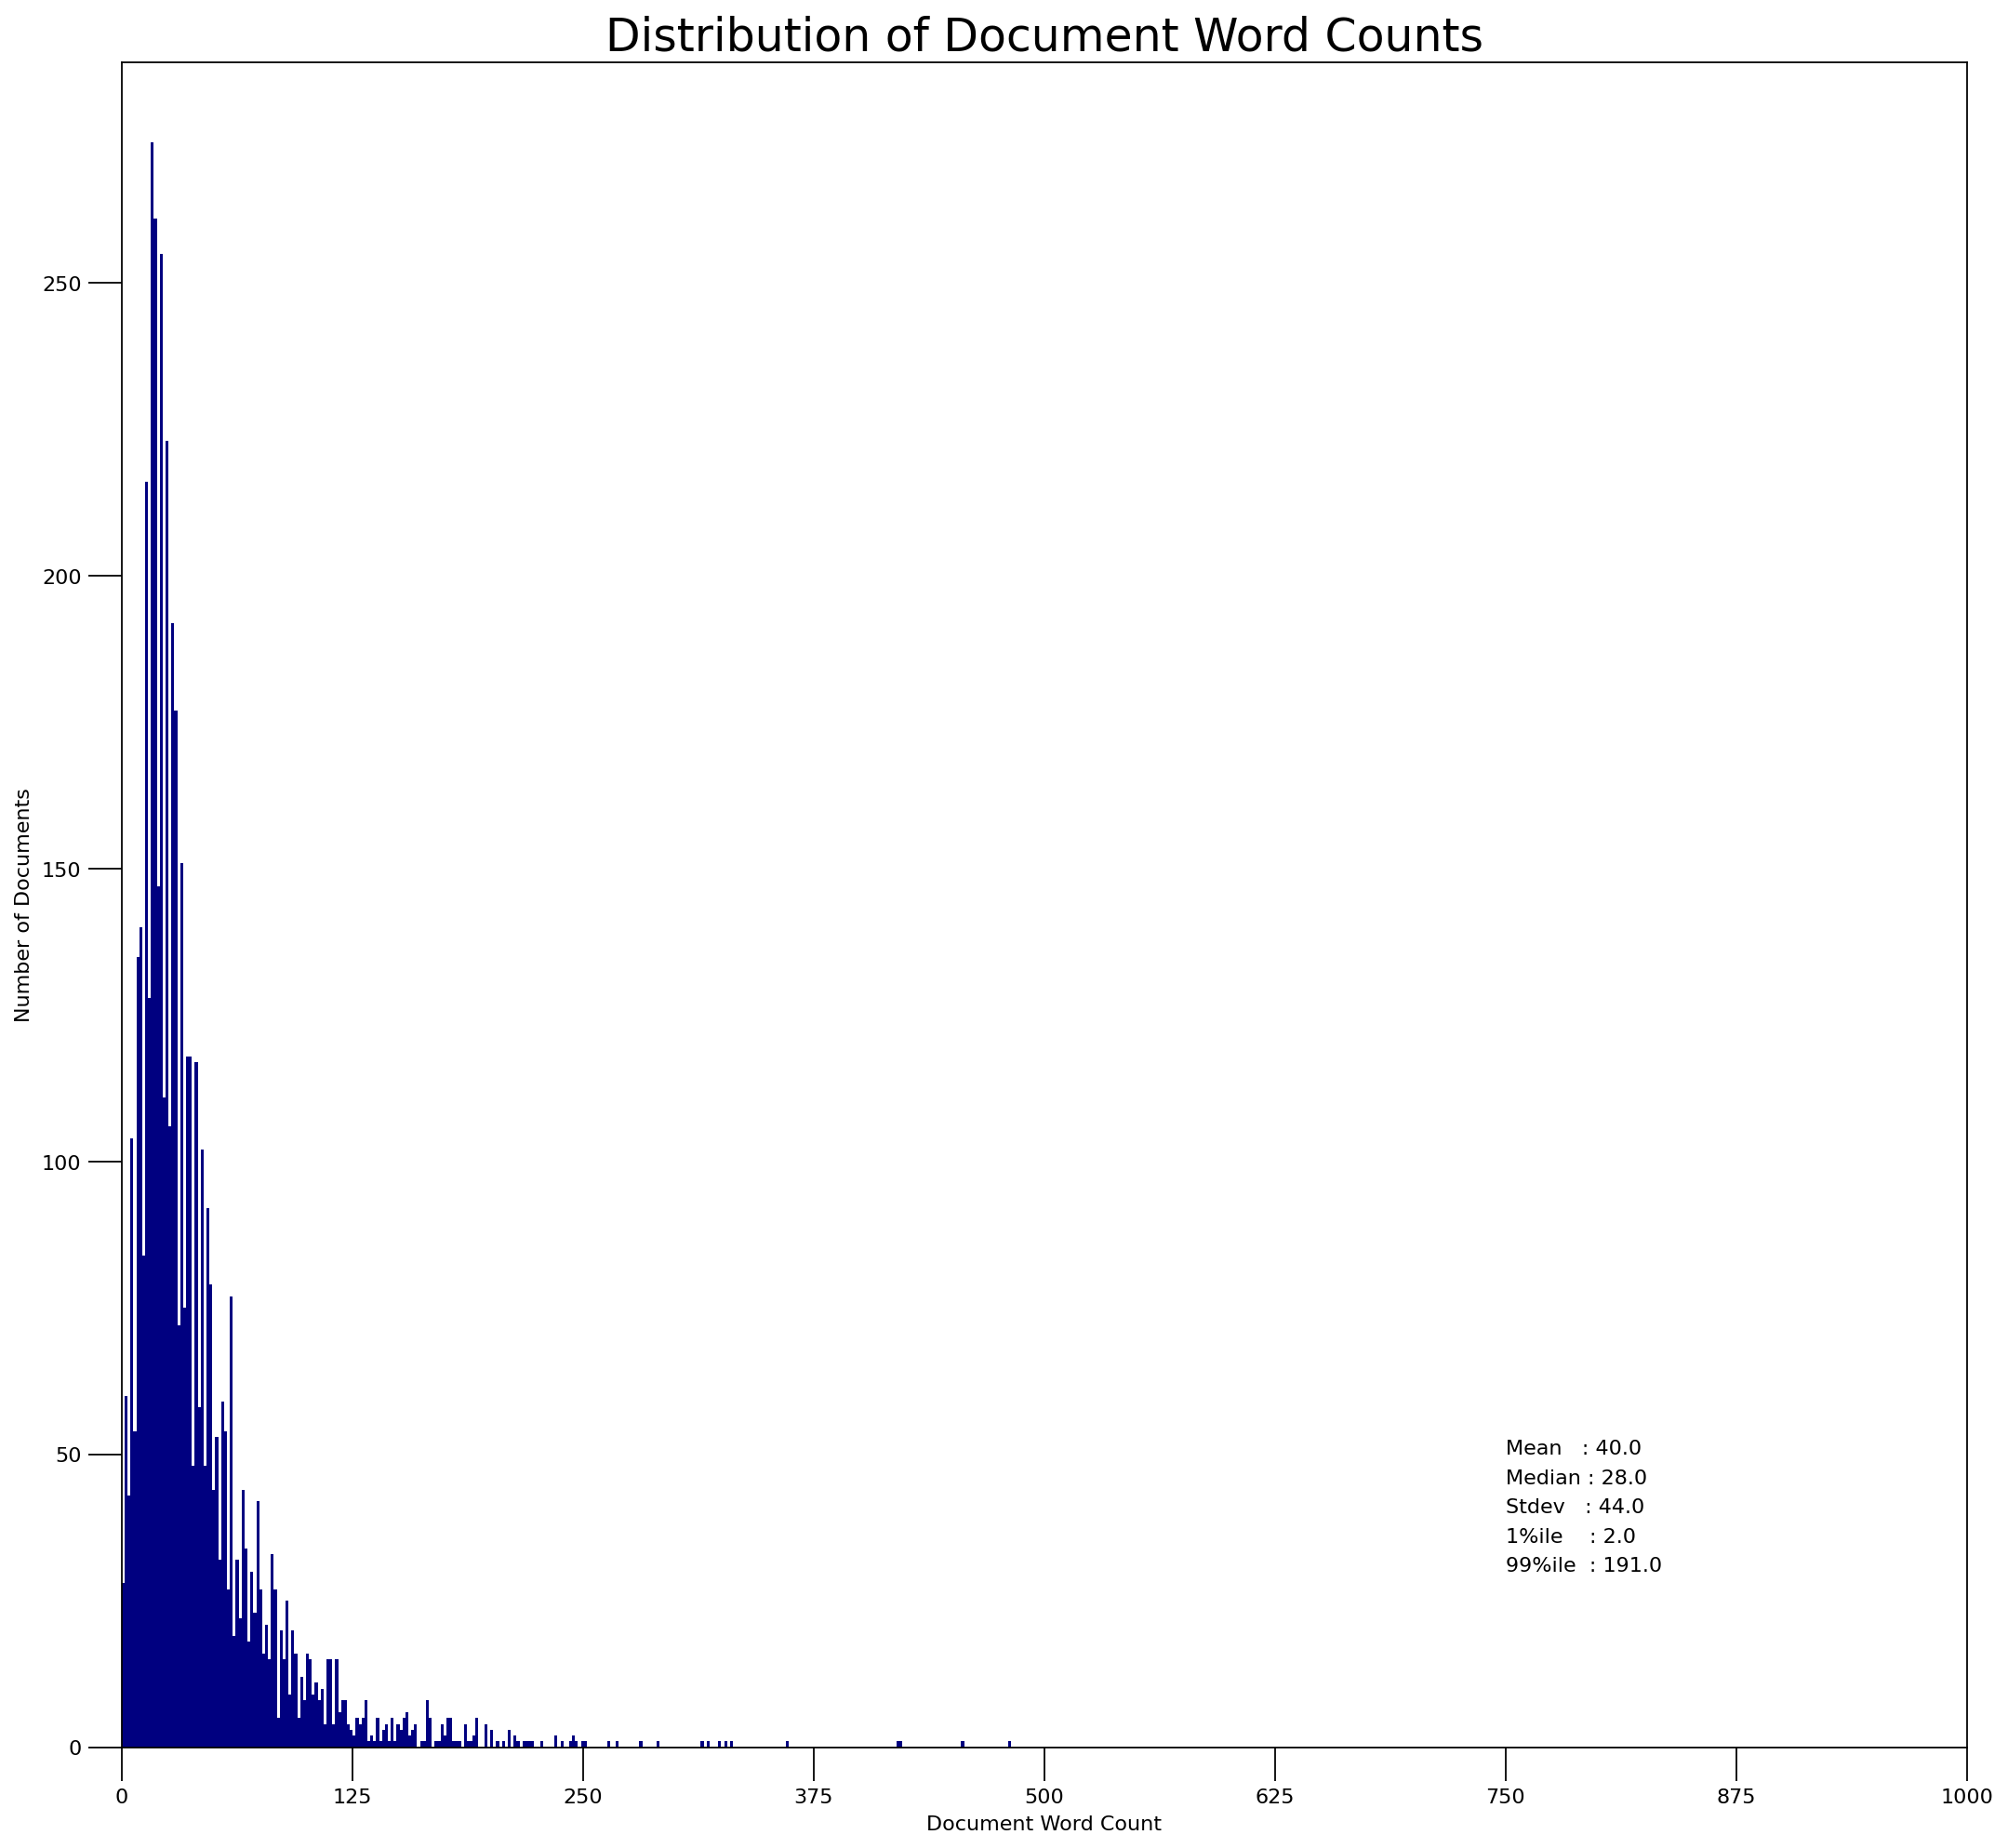

In [24]:
frequency_distribution_word_counts_in_documents(df_dominant_topic)


In [35]:
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
import numpy as np

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4419 samples in 0.002s...
[t-SNE] Computed neighbors for 4419 samples in 0.065s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4419
[t-SNE] Computed conditional probabilities for sample 2000 / 4419
[t-SNE] Computed conditional probabilities for sample 3000 / 4419
[t-SNE] Computed conditional probabilities for sample 4000 / 4419
[t-SNE] Computed conditional probabilities for sample 4419 / 4419
[t-SNE] Mean sigma: 0.037737
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.372078
[t-SNE] KL divergence after 1000 iterations: 0.994503


Loading BokehJS ...